c:\Users\ACER\Documents\7th semester\AI LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


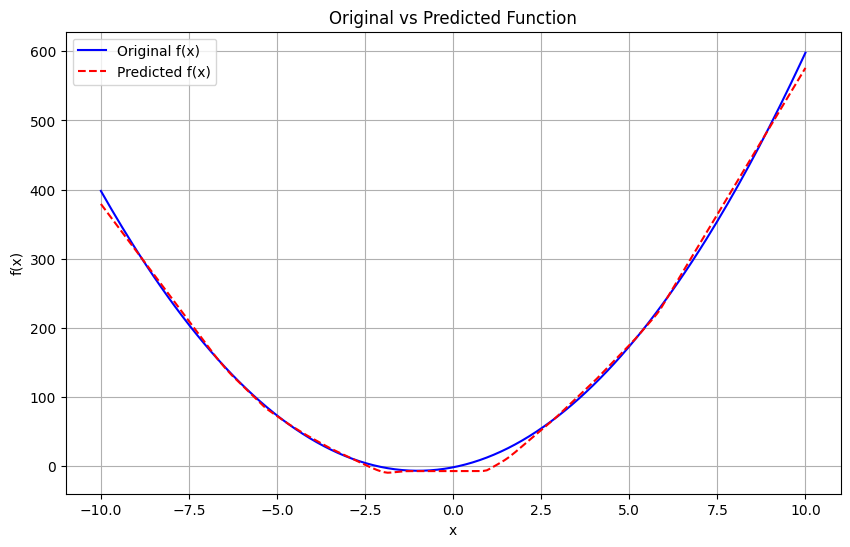

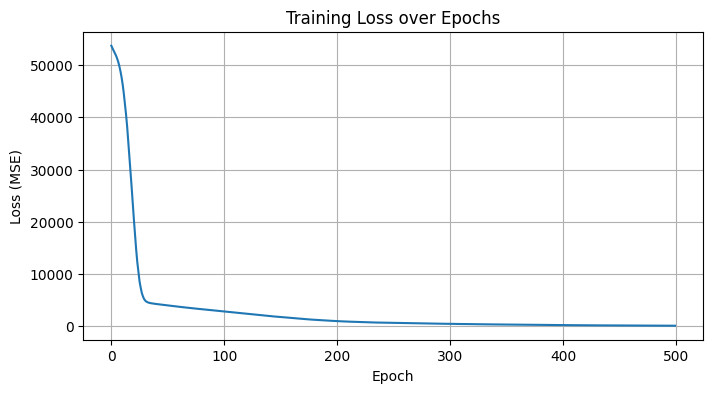

In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Prepare Data
# Input x values
x = np.linspace(-10, 10, 200)
# Original function
y = 5*x**2 + 10*x - 2

# Step 3: Build FCFNN Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(1,)),  # Hidden Layer 1
    Dense(32, activation='relu'),                    # Hidden Layer 2
    Dense(1, activation='linear')                    # Output Layer
])

# Step 4: Compile Model
model.compile(optimizer='adam', loss='mse')

# Step 5: Train Model
history = model.fit(x, y, epochs=500, batch_size=16, verbose=0)

# Step 6: Predict using the trained model
y_pred = model.predict(x)

# Step 7: Plot Original vs Predicted
plt.figure(figsize=(10,6))
plt.plot(x, y, label='Original f(x)', color='blue')
plt.plot(x, y_pred, label='Predicted f(x)', color='red', linestyle='--')
plt.title('Original vs Predicted Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Plot training loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()


Epoch 1/500 - MSE: 53992.3398
Epoch 10/500 - MSE: 49767.6602
Epoch 20/500 - MSE: 33069.0117
Epoch 30/500 - MSE: 10456.2900
Epoch 40/500 - MSE: 4437.9482
Epoch 50/500 - MSE: 3973.8127
Epoch 60/500 - MSE: 3691.3271
Epoch 70/500 - MSE: 3417.4016
Epoch 80/500 - MSE: 3155.5811
Epoch 90/500 - MSE: 2890.1873
Epoch 100/500 - MSE: 2619.4663
Epoch 110/500 - MSE: 2385.4377
Epoch 120/500 - MSE: 2160.1067
Epoch 130/500 - MSE: 1950.5541
Epoch 140/500 - MSE: 1749.9058
Epoch 150/500 - MSE: 1576.6747
Epoch 160/500 - MSE: 1445.0085
Epoch 170/500 - MSE: 1305.3134
Epoch 180/500 - MSE: 1194.9619
Epoch 190/500 - MSE: 1111.6382
Epoch 200/500 - MSE: 1044.3597
Epoch 210/500 - MSE: 980.4665
Epoch 220/500 - MSE: 914.6938
Epoch 230/500 - MSE: 874.4160
Epoch 240/500 - MSE: 832.0869
Epoch 250/500 - MSE: 794.0377
Epoch 260/500 - MSE: 761.6310
Epoch 270/500 - MSE: 731.4397
Epoch 280/500 - MSE: 718.2571
Epoch 290/500 - MSE: 662.1657
Epoch 300/500 - MSE: 630.3796
Epoch 310/500 - MSE: 602.5839
Epoch 320/500 - MSE: 568.5

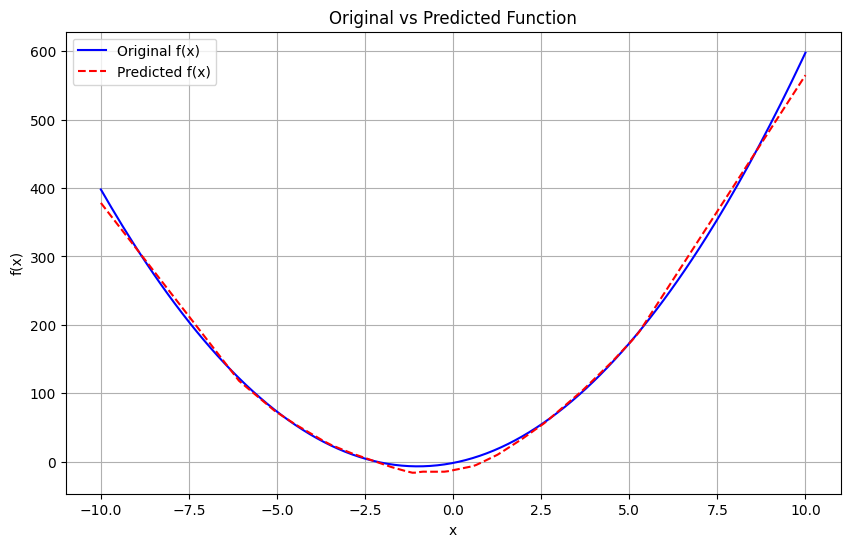

In [2]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Prepare Data
x = np.linspace(-10, 10, 200)
y = 5*x**2 + 10*x - 2

# Step 3: Build FCFNN Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(1,)),  # Hidden Layer 1
    Dense(32, activation='relu'),                    # Hidden Layer 2
    Dense(1, activation='linear')                    # Output Layer
])

# Step 4: Compile Model
model.compile(optimizer='adam', loss='mse')

# Step 5: Train Model and print epoch + MSE
epochs = 500
batch_size = 16

for epoch in range(1, epochs+1):
    history = model.fit(x, y, epochs=1, batch_size=batch_size, verbose=0)
    mse = history.history['loss'][0]
    if epoch % 10 == 0 or epoch == 1:   # print every 10 epochs and first epoch
        print(f"Epoch {epoch}/{epochs} - MSE: {mse:.4f}")

# Step 6: Predict using the trained model
y_pred = model.predict(x)

# Step 7: Plot Original vs Predicted
plt.figure(figsize=(10,6))
plt.plot(x, y, label='Original f(x)', color='blue')
plt.plot(x, y_pred, label='Predicted f(x)', color='red', linestyle='--')
plt.title('Original vs Predicted Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50 - MSE: 52737.2344
Epoch 10/50 - MSE: 3436.6050
Epoch 20/50 - MSE: 2018.0679
Epoch 30/50 - MSE: 690.9941
Epoch 40/50 - MSE: 205.0225
Epoch 50/50 - MSE: 43.1464
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


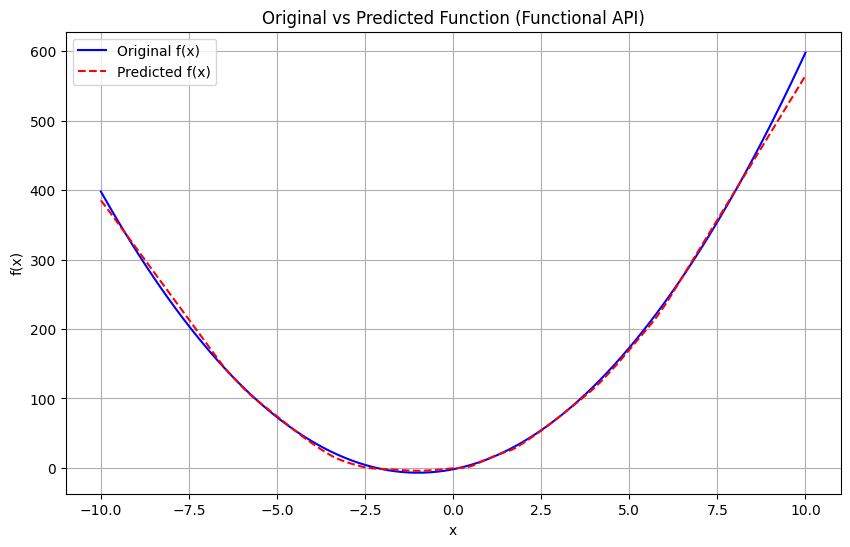

In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Step 2: Prepare Data
x = np.linspace(-10, 10, 200)
y = 5*x**2 + 10*x - 2

# Step 3: Build FCFNN using Functional API
inputs = Input(shape=(1,))

h1 = Dense(64, activation='relu')(inputs)
h2 = Dense(64, activation='relu')(h1)
h3 = Dense(64, activation='relu')(h2)
h4 = Dense(128, activation='relu')(h3)
h5 = Dense(64, activation='relu')(h4)

outputs = Dense(1, activation='linear')(h5)

model = Model(inputs, outputs)

# Step 4: Compile Model
model.compile(optimizer='adam', loss='mse')

# Step 5: Train Model and print epoch + MSE
epochs = 50
batch_size = 16

for epoch in range(1, epochs+1):
    history = model.fit(x, y, epochs=1, batch_size=batch_size, verbose=0)
    mse = history.history['loss'][0]
    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch}/{epochs} - MSE: {mse:.4f}")

# Step 6: Predict using the trained model
y_pred = model.predict(x)

# Step 7: Plot Original vs Predicted
plt.figure(figsize=(10,6))
plt.plot(x, y, label='Original f(x)', color='blue')
plt.plot(x, y_pred, label='Predicted f(x)', color='red', linestyle='--')
plt.title('Original vs Predicted Function (Functional API)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 22386.4883 - val_loss: 173626.6875
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22318.1484 - val_loss: 165702.0000
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17463.6523 - val_loss: 131144.0781
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9741.8164 - val_loss: 34593.8086
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2947.0823 - val_loss: 28332.6719
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2530.4978 - val_loss: 38102.9844
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2373.6201 - val_loss: 26592.8301
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2393.0254 - val_loss: 31428.5117
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2348.0945 - val_loss: 27460.6484
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2171.2715 - val_loss: 27335.2129
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2060.4121 - val_loss: 2

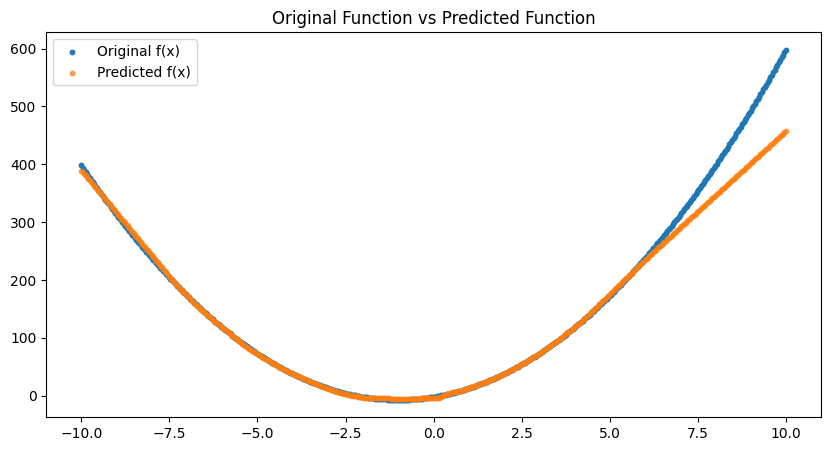

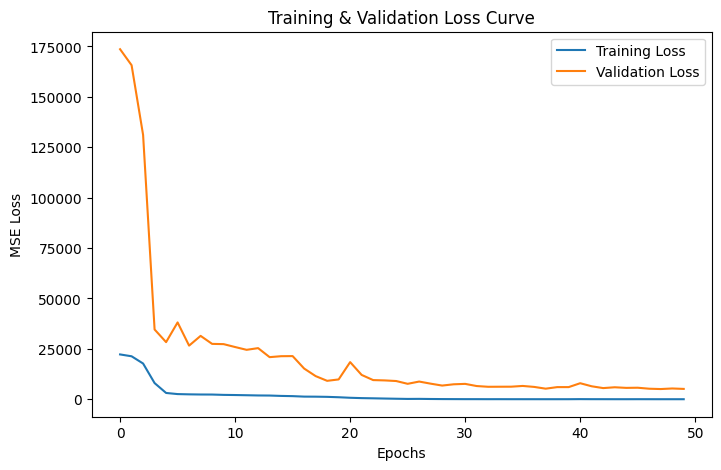

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# ✅ ডেটা তৈরি করা
X = np.linspace(-10, 10, 500).reshape(-1, 1)   # ইনপুট x
y = 5 * X**2 + 10 * X - 2                      # আসল ফাংশন f(x)

# ✅ মডেল বানানো (Functional API)
inputs = Input(shape=(1,))
h1 = Dense(64, activation='relu')(inputs)
h2 = Dense(64, activation='relu')(h1)
h3 = Dense(64, activation='relu')(h2)
h4 = Dense(128, activation='relu')(h3)
h5 = Dense(64, activation='relu')(h4)
outputs = Dense(1, activation='linear')(h5)

model = Model(inputs=inputs, outputs=outputs)

# ✅ মডেল কম্পাইল
model.compile(optimizer='adam', loss='mse')

# ✅ মডেল ট্রেনিং
history = model.fit(
    X, y,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ✅ Epoch শেষে Final Prediction
y_pred = model.predict(X)

# ✅ আসল ফাংশন আর প্রেডিকশন তুলনা করা
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Original f(x)", s=10)
plt.scatter(X, y_pred, label="Predicted f(x)", s=10, alpha=0.7)
plt.legend()
plt.title("Original Function vs Predicted Function")
plt.show()

# ✅ Loss Curve (Training vs Validation)
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training & Validation Loss Curve")
plt.legend()
plt.show()
